## predict the rings of each abalone which will lead us to the age of that abalone. 

In [1]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the  dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

### EDA

In [4]:
df["age"] = df["Rings"] + 1.5

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


<AxesSubplot:xlabel='Sex', ylabel='age'>

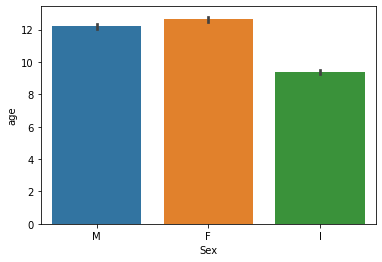

In [5]:
sns.barplot(x='Sex',y='age',data=df) 

Adding age column in the dataframe for classification. Age is classified based on the number of rings.
Rings 1-,9.33 -->Age 1, denoting young
Rings 9.33 -,18.66 -->Age 2, denoting middle
Rings .18.66 -->Age 3, denoting old

In [6]:
df_1 = df.copy()
Age = []
for i in df_1["age"]:
    if i < 9.33:
        Age.append("1")
    if i > 9.33 and i< 18.66 :
        Age.append("2")
    if i > 18.66:
        Age.append("3")
df_1["Age"] = Age
df_1.drop("age" , axis =1,inplace=True)
df_1.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [30]:
df_2=pd.DataFrame(df_1)
df_2

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,2
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


In [31]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   float64
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age             4177 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


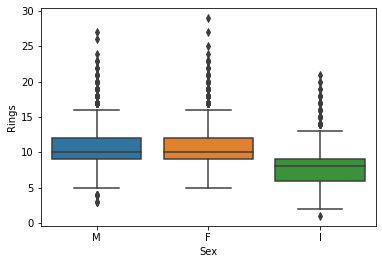

In [9]:
ax = sns.boxplot(x="Sex", y="Rings", data=df_2)


Infants have lower number of rings as compared to males and females

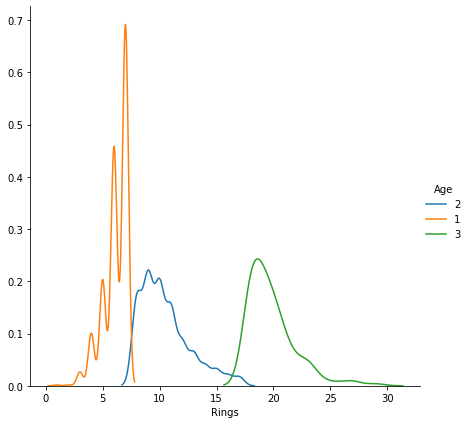

In [10]:
sns.FacetGrid(df_2, hue="Age", size=6) \
   .map(sns.kdeplot, "Rings") \
   .add_legend()


Age labelled 1 are youth, label 2 are middle aged and 3 are old aged. Young abalones have 0-9.33 rings, Middle aged abalones have 9.33-18.66 rings and old abalones have more than 18.66 rings

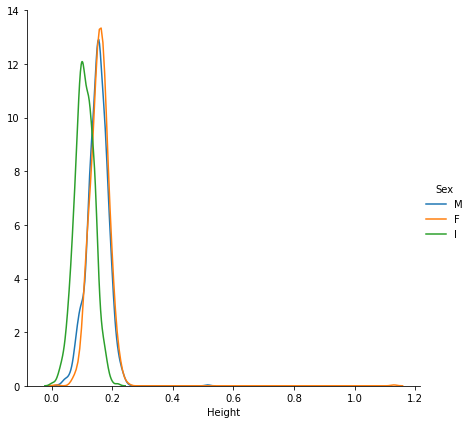

In [11]:
sns.FacetGrid(df_2, hue="Sex", size=6) \
   .map(sns.kdeplot, "Height") \
   .add_legend()
   

Female abalones have more height than males and infants. Height of infants is between 0 to 0.3mm

##### Studying the distribution of dependent and independent variables¶

<AxesSubplot:xlabel='Length', ylabel='Density'>

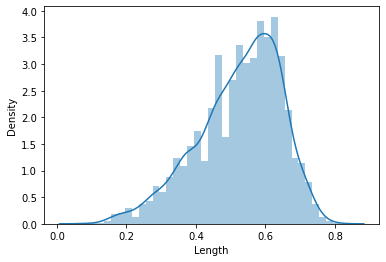

In [12]:
sns.distplot(df_2['Length'])

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

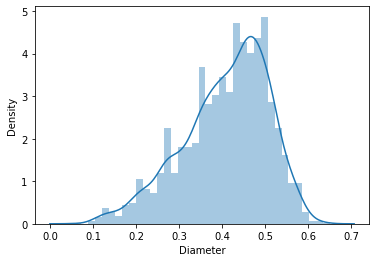

In [13]:
sns.distplot(df_2['Diameter'])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

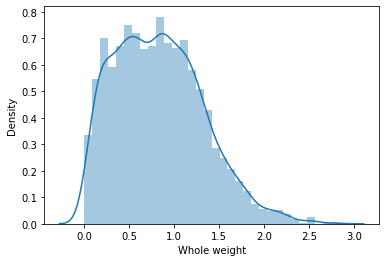

In [14]:
sns.distplot(df_2['Whole weight'])

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

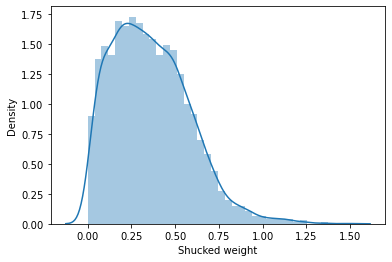

In [15]:
sns.distplot(df_2['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

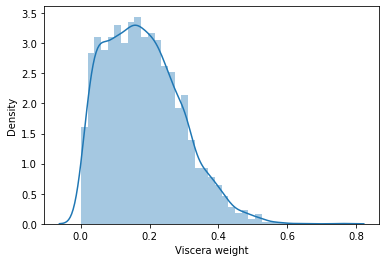

In [16]:
sns.distplot(df_2['Viscera weight'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

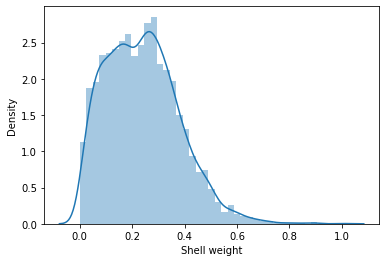

In [17]:
sns.distplot(df_2['Shell weight'])

<AxesSubplot:xlabel='Rings', ylabel='Density'>

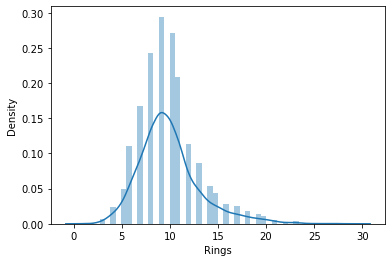

In [18]:
sns.distplot(df_2['Rings'])

From the plot below it is clear that almost all the data seems to be out of normally distribution so we have to do data reprocessing


### Scatterplot

<AxesSubplot:xlabel='Length', ylabel='Age'>

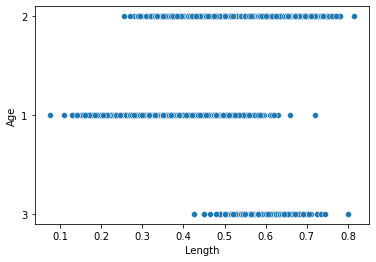

In [19]:
sns.scatterplot(x='Length',y='Age',data=df_2)

<AxesSubplot:xlabel='Height', ylabel='Age'>

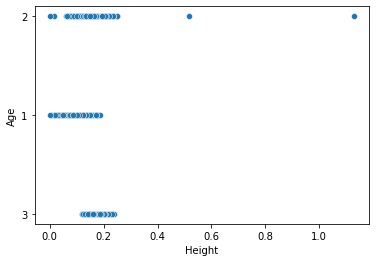

In [20]:
sns.scatterplot(x='Height',y='Age',data=df_2)

<AxesSubplot:xlabel='Whole weight', ylabel='Age'>

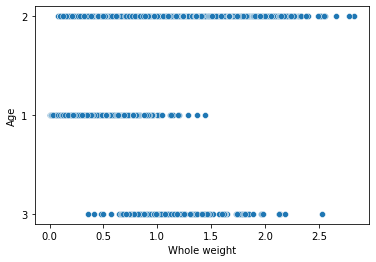

In [21]:
sns.scatterplot(x='Whole weight',y='Age',data=df_2)

<AxesSubplot:xlabel='Shucked weight', ylabel='Age'>

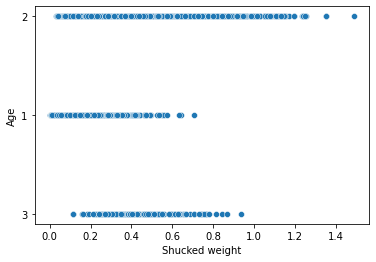

In [22]:
sns.scatterplot(x='Shucked weight',y='Age',data=df_2)

<AxesSubplot:xlabel='Viscera weight', ylabel='Age'>

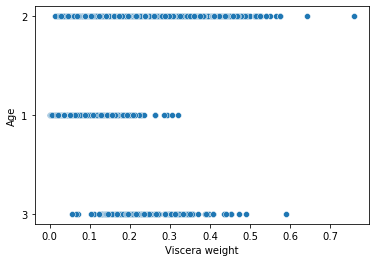

In [23]:
sns.scatterplot(x='Viscera weight',y='Age',data=df_2)

<AxesSubplot:xlabel='Shell weight', ylabel='Age'>

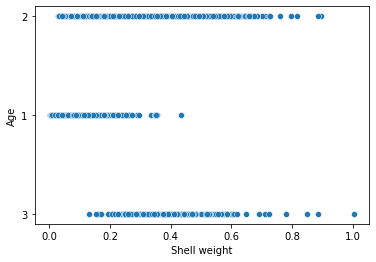

In [24]:
sns.scatterplot(x='Shell weight',y='Age',data=df_2)

In [32]:
df_2.drop('Rings', axis=1, inplace=True)
df_2

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,2
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,2


# Data Preprocessing and Model making

In [44]:
X = df_2[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']]
Y = df_2["Age"]


In [49]:

from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split( X, Y, test_size=0.33, random_state=42)

In [50]:
X_train_1.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
1593,0.525,0.380,0.135,0.6150,0.2610,0.1590,0.1750
111,0.465,0.360,0.105,0.4310,0.1720,0.1070,0.1750
3271,0.520,0.425,0.155,0.7735,0.2970,0.1230,0.2550
1089,0.450,0.330,0.105,0.3715,0.1865,0.0785,0.0975
2918,0.600,0.445,0.135,0.9205,0.4450,0.2035,0.2530


In [51]:
scaler = StandardScaler()
scaler.fit_transform(X_train_1)

array([[-0.0087207 , -0.29809198, -0.11953437, ..., -0.45497812,
        -0.21213327, -0.47094179],
       [-0.51010106, -0.50012949, -0.82192956, ..., -0.85203352,
        -0.68742939, -0.47094179],
       [-0.05050239,  0.15649242,  0.34872909, ..., -0.29437144,
        -0.54118443,  0.09719248],
       ...,
       [-0.13406579, -0.14656385, -0.3536661 , ..., -0.53082016,
        -0.44521117, -0.37861997],
       [ 0.40909627,  0.56056744, -0.47073197, ...,  0.68265253,
         0.33171518, -0.04484108],
       [ 0.57622305,  0.6615862 ,  0.46579495, ...,  0.82095273,
         0.44596906,  0.21081934]])

In [52]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_1, y_train_1)
y_pred = clf.predict(X_test)
print("Test score "+str(clf.score(X_test_1, y_test_1)))
print("Train score "+str(clf.score(X_train_1, y_train_1)))
from sklearn.metrics import classification_report
print("Classification report :")
print(classification_report(y_test_1, y_pred))

Test score 0.851341551849166
Train score 0.8573981415296641
Classification report :
              precision    recall  f1-score   support

           1       0.79      0.63      0.70       302
           2       0.86      0.95      0.91      1034
           3       0.00      0.00      0.00        43

    accuracy                           0.85      1379
   macro avg       0.55      0.53      0.54      1379
weighted avg       0.82      0.85      0.83      1379



### Conclusion

In [53]:
import numpy as np
a=np.array(y_test_1)
predicted=np.array(clf.predict(X_test_1))
df_com=pd.DataFrame({"Original":a,"predicted":predicted},index=range(len(a)))
df_com

,Original,predicted
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
1374,2,1
1375,1,1
1376,2,2
1377,1,2
